# Fitting

### Least-Squares Line Fitting

$$
B = \left( X^T X \right)^{-1} X^T Y
$$

[[285.  45.]
 [ 45.   9.]]
[1.61195551 2.58261267]


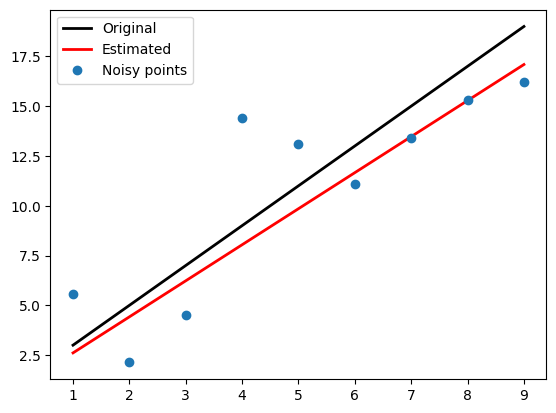

In [1]:
# Least-Squares
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2 # Line equation: y = m*x + c. m is the slope. c is the intercept.
c = 1
x = np.arange(1,10, 1)
n = 2.*np.random.randn(len(x)) # Noise
o = np.zeros(x.shape)
y = m*x + c + n + o # Noisy points confirming to a line

X = np.concatenate([x.reshape(len(x),1), np.ones((len(x), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@y # Pseudo inverse computation
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

### Effect of Outliers

[[1017.25  114.5 ]
 [ 114.5    19.  ]]
[ 2.9266401 -3.4846857]


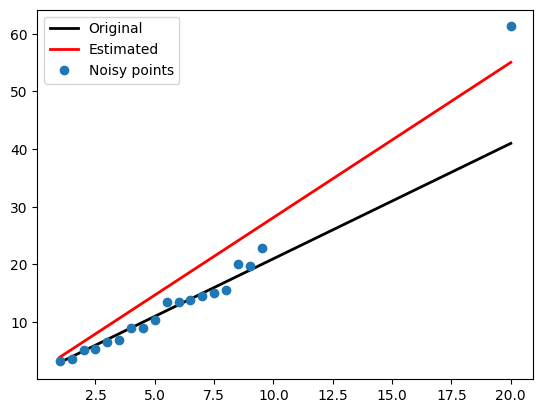

In [2]:
# Total Least Squares

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2
c = 1
x = np.arange(1,10, 0.5) # Un-corrupted x
# Append a number to x
x = np.append(x, 20)
n = np.random.randn(len(x))
o = np.zeros(x.shape)
o[-1] = 20 # Outliers
y = m*x + c + n + o

X = np.concatenate([x.reshape(len(x),1), np.ones((len(x), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@y
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.legend(loc='best')

### Total Least Square

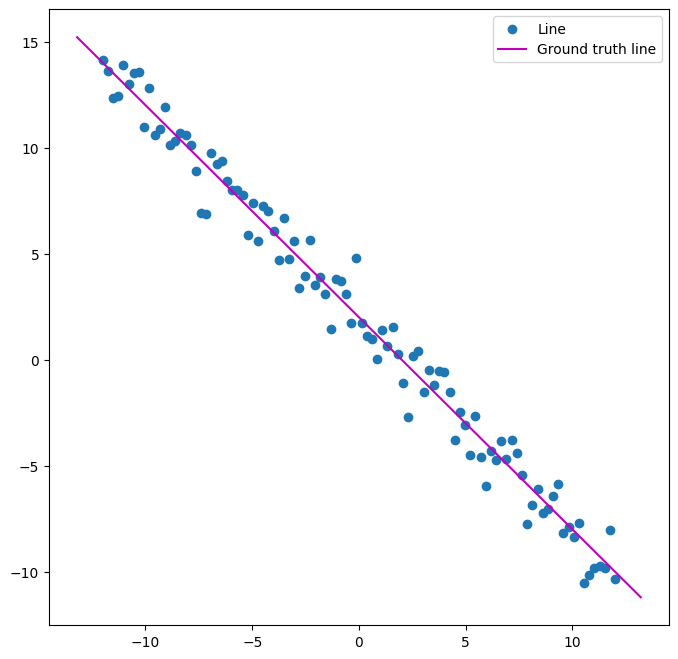

In [4]:
# Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib
# np.random.seed(0)
N = 100
t = np.random.uniform(0, 2*np.pi, N)

s = 1.
m, c = -1, 2
x = np.linspace(-12, 12, N) 
y = m*x + c + s*np.random.randn(N)
X_line = np.hstack((x.reshape(N,1), y.reshape(N,1))) 

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='Line')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m*x_ + c
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()

$$
d = a\bar{x} + b\bar{y}
$$

$$
\left\| \begin{bmatrix} 
x_1 - \bar{x} & y_1 - \bar{y} \\
x_2 - \bar{x} & y_2 - \bar{y} \\
\vdots & \vdots \\
x_n - \bar{x} & y_n - \bar{y}
\end{bmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} \right\|^2 = \|UN\|^2
$$

$$
\text{Minimize } \|UN\|^2 \text{ subject to } \|N\|^2 = 1
$$


Best line model [0.71124437 0.70294484 1.36702461]


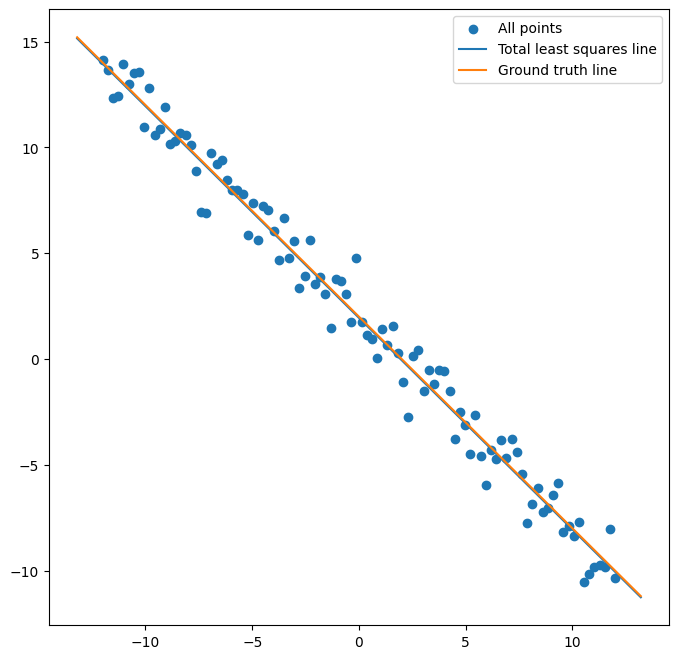

In [5]:
# Item 2: Line fitting with Total Least Squares
import math
N = X_line.shape[0]
X_ = X_line


U = X_ - np.mean(X_, axis=0)

# Eigenvector of 𝑈^𝑇𝑈 associated with the smallest eigenvalue
_, _, Vt = np.linalg.svd(np.transpose(U)@U)
a, b = Vt[-1, 0], Vt[-1, 1]
d = a*np.mean(X_[:,0]) + b*np.mean(X_[:,1])
best_model_line = np.array([a, b, d])

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='All points')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_, label='Total least squares line')
y_ = m*x_ + c
plt.plot(x_, y_, label='Ground truth line')
plt.legend()

### Total least squares line fitting with scicpy.optimize with RANSAC

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.9279011413683245e-08
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7
rex.x:  [0.69703402 0.71703807 2.24904181]
Iteration =  0 . No. inliners =  55
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.868619099046721
            Iterations: 4
            Function evaluations: 22
            Gradient evaluations: 4
[0.69950591 0.71462683 1.88304106] 5.868619099046721
A better model found ...  [0.69950591 0.71462683 1.88304106] 5.868619099046721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.231570133905819e-10
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6
rex.x:  [0.76602379 0.64281223 2.28360359]
Iteration =  1 . No. inliners =  44
Optimization terminated successfully    (Exit mode 0)
            Current functi

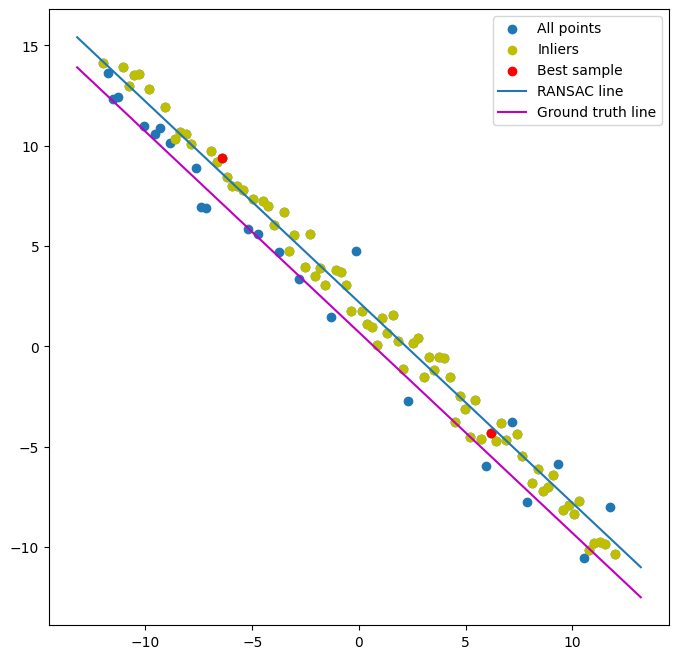

In [6]:
# Item 2: Total least squares line fitting with scicpy.optimize with RANSAC
import math
N = X_line.shape[0]
X_ = X_line

def line_equation_from_points(x1, y1, x2, y2):
    # Calculate the direction vector (Δx, Δy)
    delta_x = x2 - x1
    delta_y = y2 - y1

    # Calculate the normalized vector (a, b)
    magnitude = math.sqrt(delta_x**2 + delta_y**2)
    a = delta_y / magnitude
    b = -delta_x / magnitude

    # Calculate d
    d = (a * x1) + (b * y1)

    # Return the line equation in the form ax + by = d
    return a, b, d

# RANSAC to fit a line
def line_tls(x, indices):
    a, b, d = x[0], x[1], x[2]
    return np.sum(np.square(a*X_[indices,0] + b*X_[indices,1] - d))

# Constraint
def g(x):
    return x[0]**2 + x[1]**2 - 1

cons = ({'type': 'eq', 'fun': g})

# Computing the consensus (inliers)
def consensus_line(X, x, t):
    a, b, d = x[0], x[1], x[2]
    error = np.absolute(a*X_[:,0] + b*X_[:,1] - d)
    return error < t

t = 1.   # Threshold value to determine data points that are fit well by model.
d = 0.4*N   # Number of close data points required to assert that a model fits well to data.
s = 2       # Minimum number of data points required to estimate model parameters.

inliers_line = []        # Indinces of the inliers
max_iterations = 50
iteration = 0
best_model_line = []     # Best model normal (a, b) and distance from origin d
best_error = np.inf
best_sample_line = []    # Three-point sample leading to the best model computation
res_only_with_sample = [] # Result (a, b, d) only using the best sample
best_inliers_line = []   # Inliers of the model computed form the best sample

while iteration < max_iterations:   
    indices = np.random.randint(0, N, s) # A sample of three (s) points selected at random
    x0 = np.array([1, 1, 0]) # Initial estimate
    res = minimize(fun = line_tls, args = indices, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
    inliers_line = consensus_line(X_, res.x, t) # Computing the inliers
    print('rex.x: ', res.x)    
    print('Iteration = ', iteration, '. No. inliners = ', inliers_line.sum())
    if inliers_line.sum() > d:
        x0 = res.x
        # Computing the new model using the inliers
        res = minimize(fun = line_tls, args = inliers_line, x0 = x0, tol= 1e-6, constraints=cons, options={'disp': True})
        print(res.x, res.fun)
        if res.fun < best_error:
            print('A better model found ... ', res.x, res.fun)
            best_model_line = res.x
            best_eror = res.fun
            best_sample_line = X_[indices,:]
            res_only_with_sample = x0
            best_inliers_line = inliers_line

    iteration += 1

print('Best line model', best_model_line)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1], label='All points')
ax.scatter(X_[best_inliers_line,0],X_[best_inliers_line,1], color='y', label='Inliers')
ax.scatter(best_sample_line[:,0],best_sample_line[:,1], color='r', label='Best sample')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_model_line[1]*x_ + best_model_line[2])/best_model_line[1]
plt.plot(x_, y_,  label='RANSAC line')
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()

## RANSAC

Samples [76 94]
[ 8.6 10.4] [20.73629726 19.0954603 ]
m, b: -0.9115760918286149 28.575851652329305
[1133.4693759   503.8684277   600.0316124   942.29873549 1133.97038614
 1324.86283193  925.01954265  934.1509098   846.40117991  939.43256293
 1155.00574516 1150.94841635 1182.72333902 1656.39374551 1411.82128712
  774.86883211 1371.96011883 1496.20419501 1604.82597857 1201.49900645
 1918.66855768 1644.49240362 1518.53188945 1399.81615081 1694.05571852
 1550.00969104  825.41475332 1904.0538925  1975.77815676 2728.16074092
 1758.88173736 1595.28061257 1307.06055675 1385.59191137 1569.01274847
 1784.12626936 1649.0672072  1822.07397125 1488.17368413 1616.20216469
 1257.84331701 1257.28253099 2994.07192312 1629.87331279 2241.48407349
 2782.38012629 2065.39979254 2176.91652005 1997.79590306 2222.33284937
 2634.95096323 1821.13614984 1983.86661474 1350.64080381 2484.52935499
 1540.08993754 2478.57752697 2719.5383076  1861.30285164 2346.15449177
 1833.78411292 3296.4416511  3020.68630188 3169.8

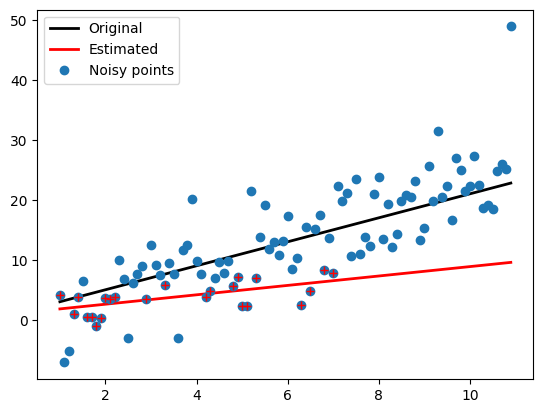

In [7]:
# RANSAC

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2
c = 1
xo = np.arange(1,11, 0.1) # Un-corrupted x
mu, sigma = 0, 5 # mean and standard deviation
#x = xo + np.random.normal(mu, sigma, len(xo)) # noisy x
x = xo
n = np.random.normal(mu, sigma, len(xo))
o = np.zeros(x.shape)
o[-1] = 20 # Outliers
y = m*x + c + n + o

def line(x,y):
    m = (y[1] - y[0])/(x[1] - x[0])
    b = y[0] - m*x[0]
    print("m, b:", m, b)
    return m, -1, b

def distance(parameters, x, y):
    a = parameters[0]
    b = parameters[1]
    d = parameters[2]
    return (a*x + b*y - d)**2


thresh = 10
s = 2
loop = True 
consensus = []
while loop:
    samples = np.random.choice(len(x), 2, replace=False)
    print("Samples", samples)
    xs = x[samples]
    ys = y[samples]
    print(xs,ys)
    parameters = line(xs,ys)
    print(distance(parameters, x, y) )
    consensus =  distance(parameters, x, y) < thresh
    print('Consensus: ', consensus)
    print("Lenght:", sum(consensus))
    if sum(consensus) >= 2:
        loop = False
    

xc = x[consensus]
yc = y[consensus]
print("xc:", xc)
print("yc", yc)
X = np.concatenate([xc.reshape(len(xc),1), np.ones((len(xc), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@yc
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.plot(xc, yc, '+', color='r')
plt.legend(loc='best')

## Hough Lines

In [10]:
# Hough Lines
import cv2 as cv
import numpy as np
img = cv.imread('Images-20240703\sigiriya.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,100,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

# Plotting
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

    
cv.namedWindow("Image", cv.WINDOW_NORMAL)
cv.imshow("Image", img)
cv.waitKey()
cv.imshow("Image", edges)
cv.waitKey()
cv.destroyAllWindows()

## Hough Circles

In [17]:
# Hough Circles
import cv2 as cv
import numpy as np

img = cv.imread('coins\coins.png',0)
cv.imshow('Detected Circles', img)  
cv.waitKey(0)
img = cv.medianBlur(img,7)
img = cv.GaussianBlur(img, (7,7), 3)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT,1,40, param1=50,param2=30,minRadius=20,maxRadius=50)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

# Display the results

cv.imshow('Detected Circles', cimg)  # Change this to display the image with circles
cv.waitKey(0)
cv.destroyAllWindows()  # Close all OpenCV windows

## Generalized Hough Transform

In [18]:
# Generalized Hough Transform

import cv2 as cv
import numpy as np
im = cv.imread('coins\coins.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
templ  = cv.imread('coins\penny.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Canny edge detection
im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)

# Canny thresholds not reuired as 
# alg.setCannyLowThresh(50)
# alg.setCannyHighThresh(250)

# Votes thresholds (to be carefully selected)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)

# alg.setAngleThresh(400000)
# alg.setScaleThresh(10000)
# alg.setPosThresh(100)

alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)       
alg.setMaxScale(1.1)

positions, votes = alg.detect(im_edges) # Actual detection

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1]/ 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))

cv.namedWindow('Image')
cv.imshow('Image', templ)
cv.waitKey(0)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', out)
cv.waitKey(0)
cv.destroyAllWindows()

x = 1520.0, y = 154.0, scale = 1.100000023841858, orientation = 180.0, p1 = (1437, 71), p2 = (1602, 236)


In [19]:
votes

array([[[    1025,   341559, 12705155]]], dtype=int32)